# Project Title - Analysing Patient Profile for Disease Symptoms using EDA 


## Problem Statement<br>
Analysing symptoms and knowing the disease beforehand is a major concern because of its importance in saving human lives and ensuring proper medical care.
To extract relevant information from the data that can support healthcare professionals in formulating strategies related to the prevention, diagnosis, and treatment of diseases.
To study how do different symptoms like fever, cough, fatigue and difficulty breathing relate to the various disease outcomes.


In [204]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [205]:
df = pd.read_csv("Analysing_the_Patient_Profile_for_Disease_Symptoms.csv")

In [206]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [207]:
df.tail()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
344,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive
345,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
346,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
347,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive
348,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive


In [208]:
df.shape

(349, 10)

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


In [209]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print(missing_values)

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64


In [210]:
# Get descriptive statistics for the numerical columns (Age)
desc_stats = df.describe()
print(desc_stats)

              Age
count  349.000000
mean    46.323782
std     13.085090
min     19.000000
25%     35.000000
50%     45.000000
75%     55.000000
max     90.000000


## Univariate Analysis

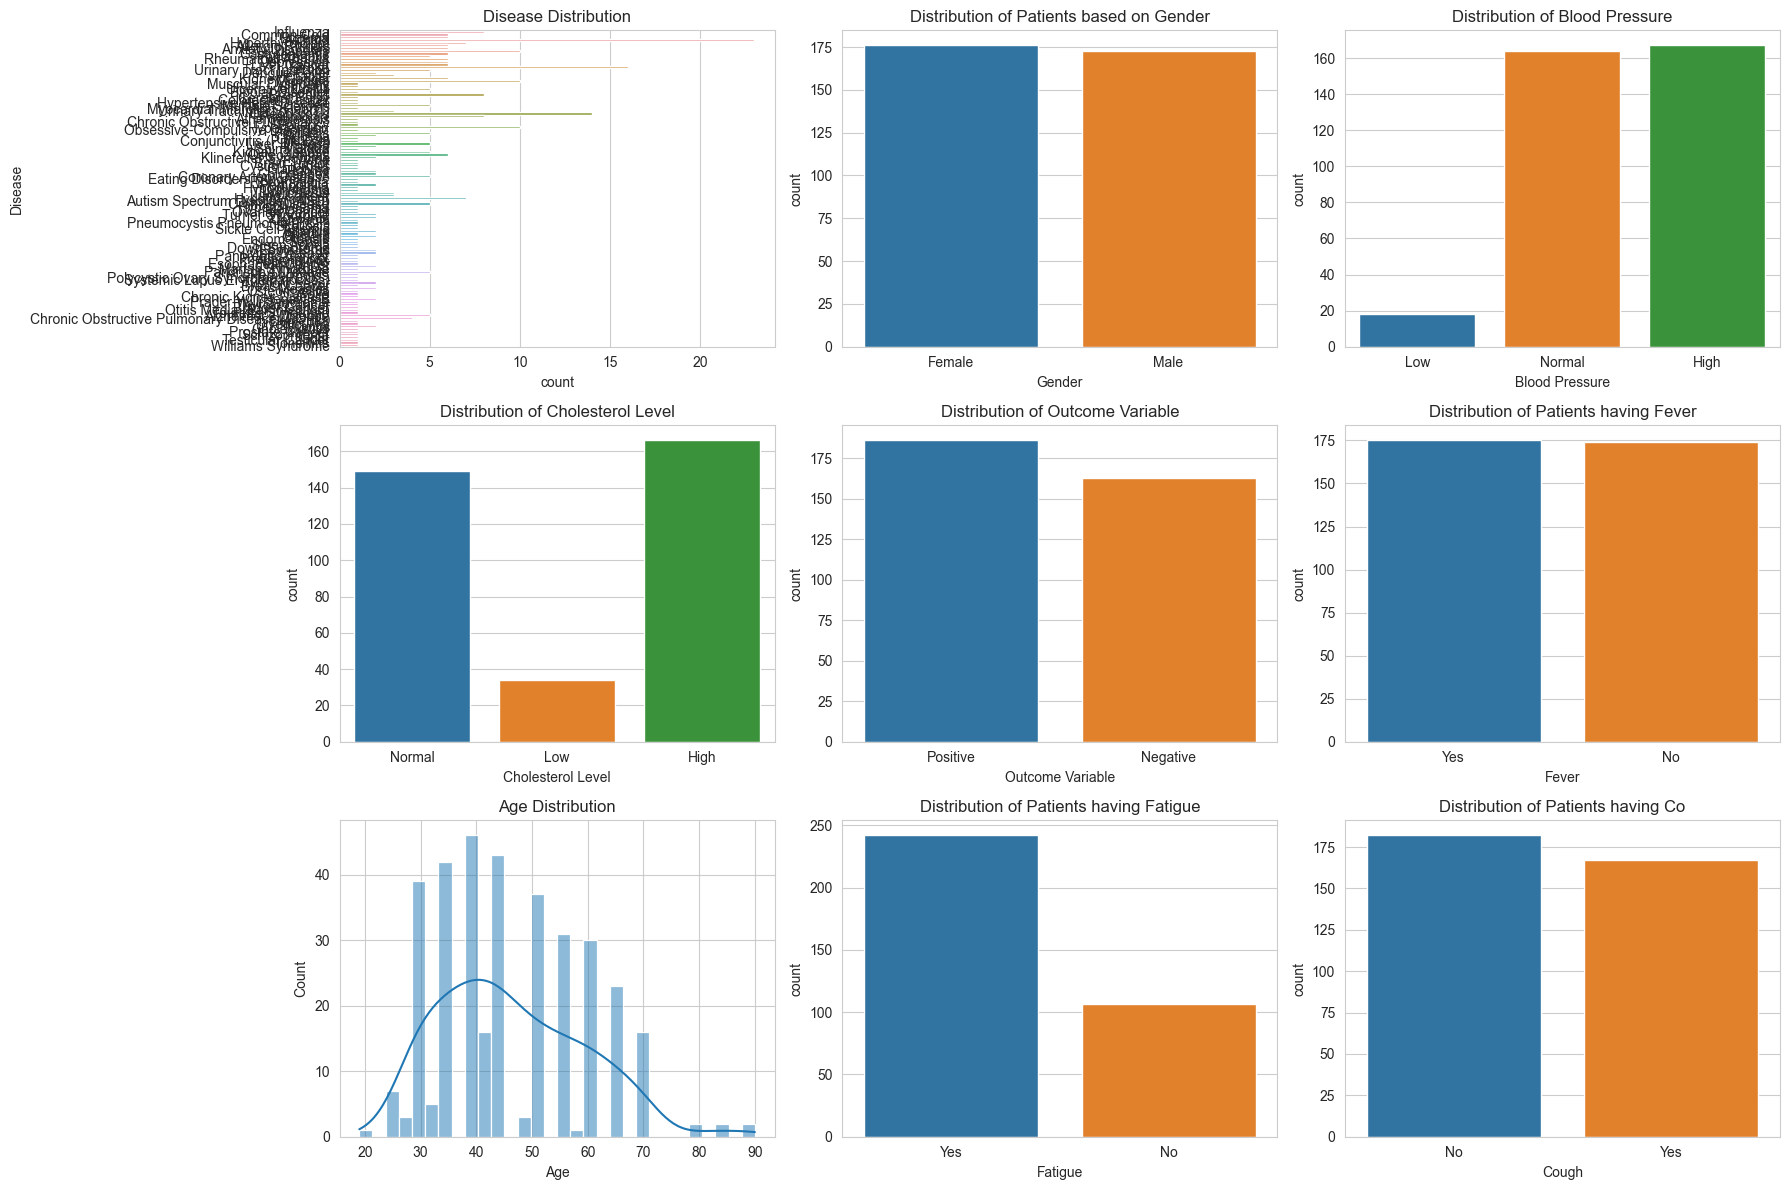

In [211]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Define the figure size for the plots
plt.figure(figsize=(18, 12))

# Plotting univariate distributions
# Disease Distribution
plt.subplot(3, 3, 1)
sns.countplot(data=df, y='Disease')
plt.title('Disease Distribution')

# Gender Distribution
plt.subplot(3, 3, 2)
sns.countplot(data=df, x='Gender')
plt.title('Distribution of Patients based on Gender')

# Blood Pressure Distribution
plt.subplot(3, 3, 3)
sns.countplot(data=df, x='Blood Pressure')
plt.title('Distribution of Blood Pressure')

# Cholesterol Level Distribution
plt.subplot(3, 3, 4)
sns.countplot(data=df, x='Cholesterol Level')
plt.title('Distribution of Cholesterol Level')

# Outcome Variable Distribution
plt.subplot(3, 3, 5)
sns.countplot(data=df, x='Outcome Variable')
plt.title('Distribution of Outcome Variable')

plt.subplot(3, 3, 6)
sns.countplot(data=df, x='Fever')
plt.title('Distribution of Patients having Fever')


# Age Distribution
plt.subplot(3, 3, 7)
sns.histplot(data=df, x='Age', bins=30 , kde=True)
plt.title('Age Distribution')

plt.subplot(3, 3, 8)
sns.countplot(data=df, x='Fatigue')
plt.title('Distribution of Patients having Fatigue')

plt.subplot(3, 3, 9)
sns.countplot(data=df, x='Cough')
plt.title('Distribution of Patients having Co')

# Adjust layout
plt.tight_layout()
plt.show()



## Insights


In [212]:
top_diseases = df['Disease'].value_counts().head(12)
print(top_diseases)

Disease
Asthma             23
Stroke             16
Osteoporosis       14
Hypertension       10
Diabetes           10
Migraine           10
Influenza           8
Pneumonia           8
Bronchitis          8
Hyperthyroidism     7
Hypothyroidism      7
Osteoarthritis      6
Name: count, dtype: int64


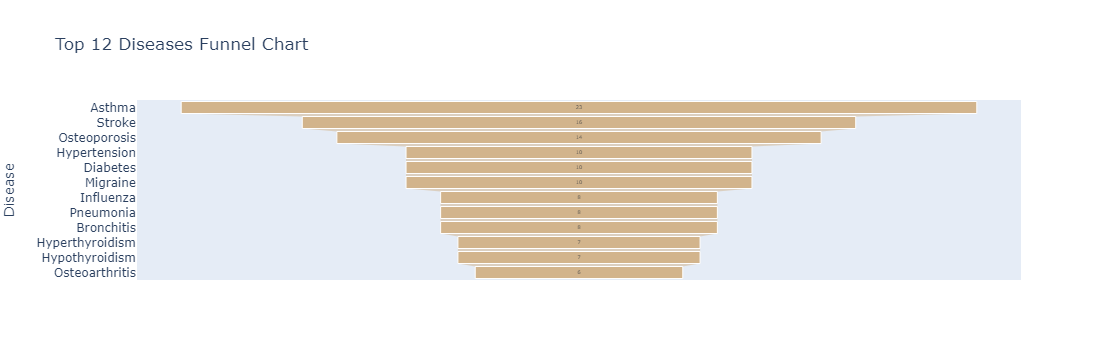

In [213]:
import plotly.express as px
import pandas as pd

# Create a DataFrame for the funnel chart
data = pd.DataFrame({
    'Disease': top_diseases.index,
    'Count': top_diseases.values
})

colors = ["tan"]

# Create a funnel chart using plotly express

fig = px.funnel(data, x='Count', y='Disease', title='Top 12 Diseases Funnel Chart', color_discrete_sequence = colors)
fig.update_traces(marker=dict(line=dict(color='white', width=1)))  # Add white border to segments
fig.show()


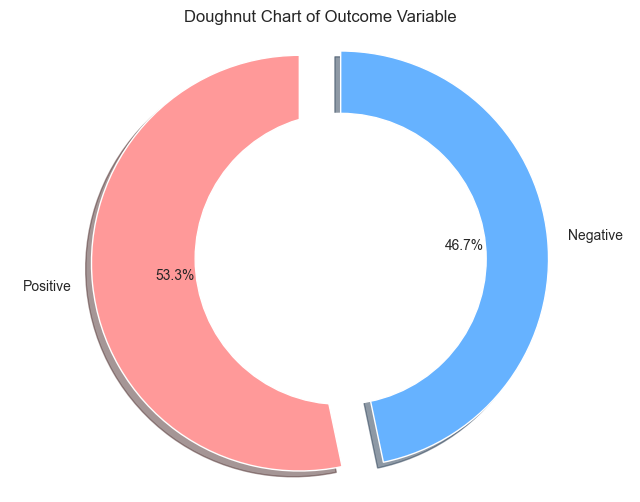

In [215]:
# Doughnut Chart for Outcome Variable
labels = df['Outcome Variable'].value_counts().index
sizes = df['Outcome Variable'].value_counts().values
explode = (0.2, 0)  # explode 1st slice for emphasis

# Plot
fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90, colors=["#FF9999", "#66B2FF"])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Doughnut Chart of Outcome Variable')
plt.show()

## Insights

## Note: 

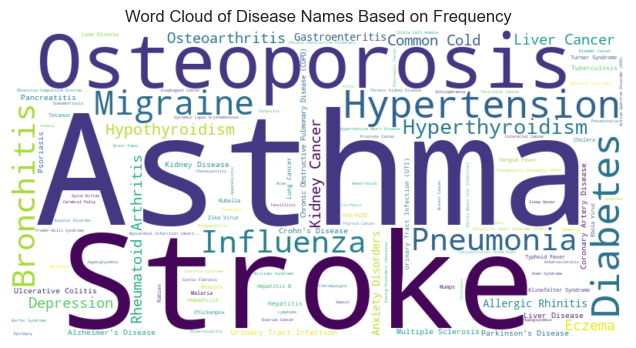

In [217]:
# Count the frequency of each disease
disease_counts = df['Disease'].value_counts()

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(disease_counts)

# Plot the word cloud
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Disease Names Based on Frequency')
plt.show()


interpolation is used to create smooth transitions between pixels. When an image is scaled, rotated, or resized, interpolation helps generate new pixel values that make the image appear continuous and visually pleasing.

# Bivariate Analysis

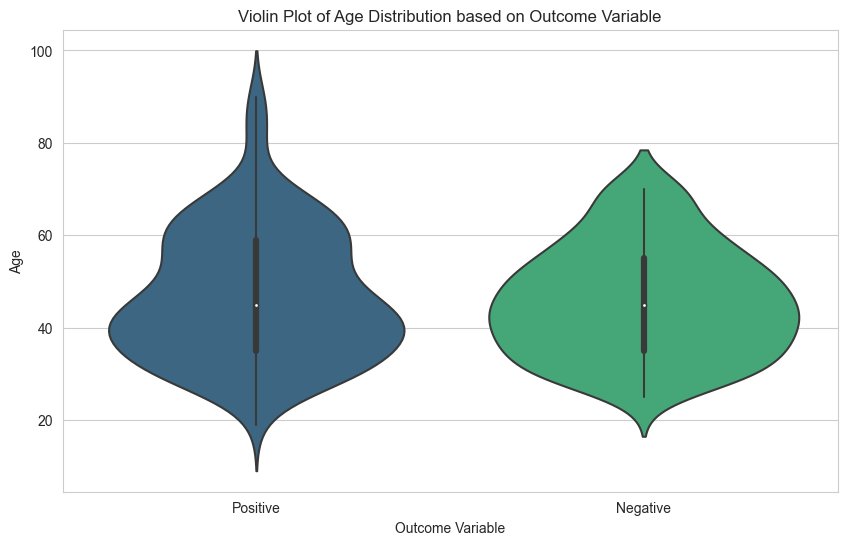

In [173]:
# Violin plot for Age based on Outcome Variable
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Outcome Variable', y='Age', palette="viridis", inner="box")
plt.title('Violin Plot of Age Distribution based on Outcome Variable')
plt.show()


## Insights

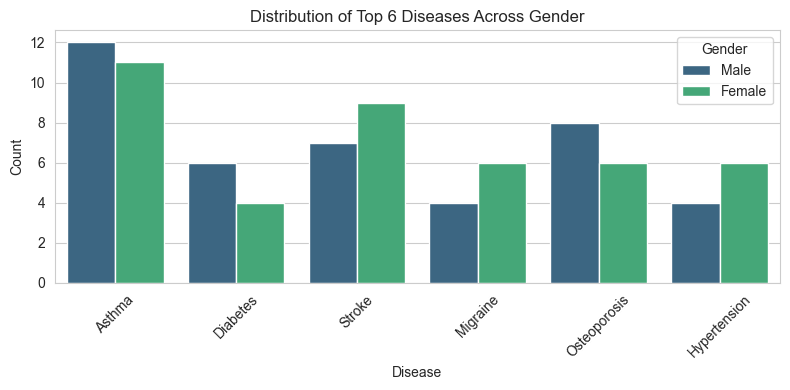

In [174]:

# Calculate the top 6 diseases
top_diseases = df['Disease'].value_counts().head(6).index

# Filter data for top 6 diseases
data_top_diseases = df[df['Disease'].isin(top_diseases)]
data_top_diseases
# Create a stacked bar chart
plt.figure(figsize=(8, 4))
sns.countplot(data=data_top_diseases, x='Disease', hue='Gender', palette='viridis')
plt.title('Distribution of Top 6 Diseases Across Gender')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


## Insights

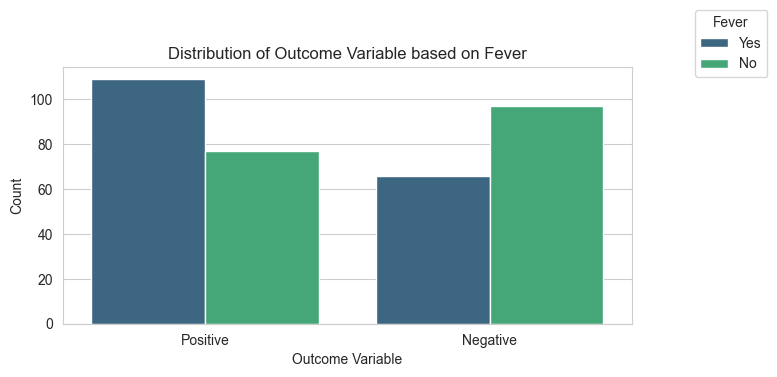

In [175]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Outcome Variable', hue='Fever', palette='viridis')
plt.title('Distribution of Outcome Variable based on Fever')
plt.xlabel('Outcome Variable')
plt.ylabel('Count')
plt.legend(title='Fever', loc='upper right', bbox_to_anchor=(1, 1, 0.25,0.25))
plt.tight_layout()
plt.show()

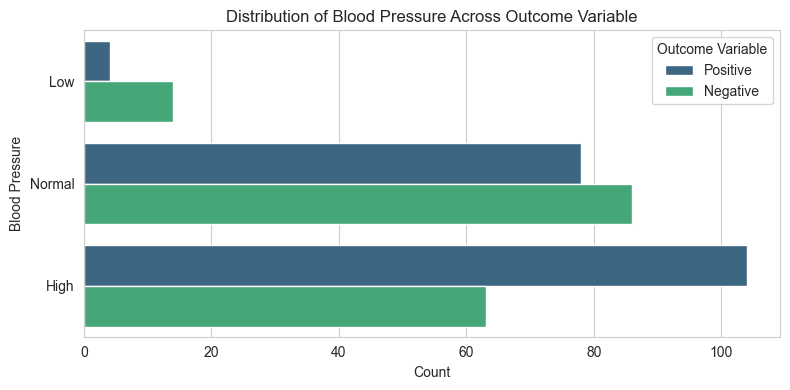

In [176]:
# Create a horizontal bar chart

plt.figure(figsize=(8, 4))
sns.countplot(data=df, y='Blood Pressure', hue='Outcome Variable', palette='viridis')
plt.title('Distribution of Blood Pressure Across Outcome Variable')
plt.xlabel('Count')
plt.ylabel('Blood Pressure')
plt.legend(title='Outcome Variable', loc='upper right')
plt.tight_layout()
plt.show()


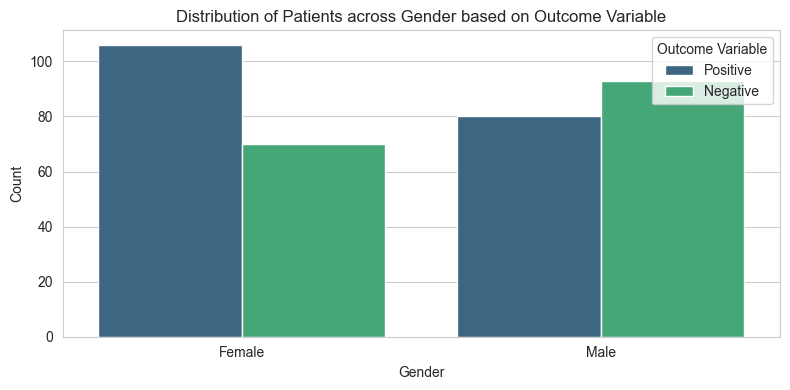

In [177]:
# Create a Grouped bar chart

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Gender', hue='Outcome Variable', palette='viridis')
plt.title('Distribution of Patients across Gender based on Outcome Variable')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Outcome Variable', loc='upper right')
plt.tight_layout()
plt.show()


## Insights

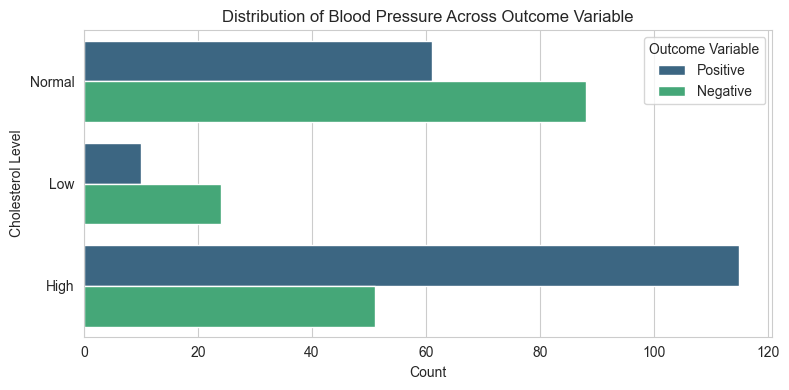

In [178]:
# Create a horizontal bar chart

plt.figure(figsize=(8, 4))
sns.countplot(data=df, y='Cholesterol Level', hue='Outcome Variable', palette='viridis')
plt.title('Distribution of Blood Pressure Across Outcome Variable')
plt.xlabel('Count')
plt.ylabel('Cholesterol Level')
plt.legend(title='Outcome Variable', loc='upper right')
plt.tight_layout()
plt.show()


## Insights

In [179]:
subset = df[['Disease', 'Age']]
subset

,Disease,Age
0,Influenza,19
1,Common Cold,25
2,Eczema,25
3,Asthma,25
4,Asthma,25
...,...,...
344,Stroke,80
345,Stroke,85
346,Stroke,85
347,Stroke,90


In [180]:
top6_disease_subset = subset['Disease'].value_counts().head(6).index
top6_disease_subset

Index(['Asthma', 'Stroke', 'Osteoporosis', 'Hypertension', 'Diabetes',
       'Migraine'],
      dtype='object', name='Disease')

In [181]:
data_top_diseases = subset[subset['Disease'].isin(top6_disease_subset)]
data_top_diseases

,Disease,Age
3,Asthma,25
4,Asthma,25
10,Asthma,28
14,Diabetes,29
20,Stroke,29
...,...,...
344,Stroke,80
345,Stroke,85
346,Stroke,85
347,Stroke,90


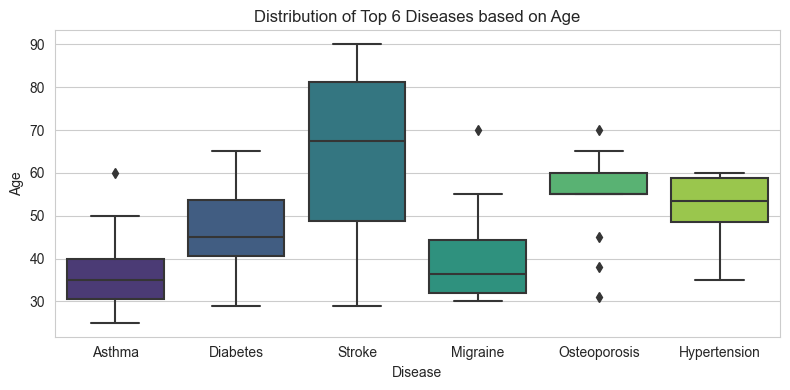

In [182]:
# Create a box plot

plt.figure(figsize=(8, 4))
sns.boxplot(data=data_top_diseases, x='Disease', y='Age', palette='viridis')
plt.title('Distribution of Top 6 Diseases based on Age')
plt.xlabel('Disease')
plt.ylabel('Age')
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Insights

In [183]:
df_female = df[df['Gender'] == 'Female']
df_female

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
5,Eczema,Yes,No,No,No,25,Female,Normal,Normal,Positive
6,Influenza,Yes,Yes,Yes,Yes,25,Female,Normal,Normal,Positive
...,...,...,...,...,...,...,...,...,...,...
342,Williams Syndrome,No,No,Yes,No,70,Female,Normal,Normal,Positive
343,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive
344,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive
347,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive


In [184]:
relative_frequency = df_female[['Disease', 'Blood Pressure']].value_counts(normalize=True) 
type(relative_frequency)

pandas.core.series.Series

In [185]:
top5_diseases = df['Disease'].value_counts().head(5)
top5_diseases

Disease
Asthma          23
Stroke          16
Osteoporosis    14
Hypertension    10
Diabetes        10
Name: count, dtype: int64

In [186]:
# Convert the relative frequency series to a DataFrame
relative_frequency_df = relative_frequency.reset_index(name='Relative Frequency')

# Display the resulting DataFrame
print(relative_frequency_df)


                             Disease Blood Pressure  Relative Frequency
0                             Asthma         Normal            0.045455
1                             Stroke           High            0.045455
2                       Osteoporosis         Normal            0.028409
3                           Migraine         Normal            0.028409
4                     Hypothyroidism           High            0.022727
..                               ...            ...                 ...
98                       Common Cold         Normal            0.005682
99                       Common Cold            Low            0.005682
100  Myocardial Infarction (Heart...           High            0.005682
101   Eating Disorders (Anorexia,...           High            0.005682
102                Allergic Rhinitis            Low            0.005682

[103 rows x 3 columns]


In [193]:
selected_diseases = ['Asthma', 'Stroke', 'Osteoporosis', 'Hypertension', 'Diabetes']
# Filter the relative_frequency DataFrame for selected diseases
selected_disease_relative_frequency = relative_frequency_df.loc[relative_frequency_df['Disease'].isin(selected_diseases)]

# Display the selected disease relative frequency
print(selected_disease_relative_frequency)


         Disease Blood Pressure  Relative Frequency
0         Asthma         Normal            0.045455
1         Stroke           High            0.045455
2   Osteoporosis         Normal            0.028409
8   Hypertension           High            0.017045
14        Asthma           High            0.017045
17  Hypertension         Normal            0.011364
33      Diabetes           High            0.011364
34      Diabetes         Normal            0.011364
60        Stroke         Normal            0.005682
72  Osteoporosis           High            0.005682
81  Hypertension            Low            0.005682


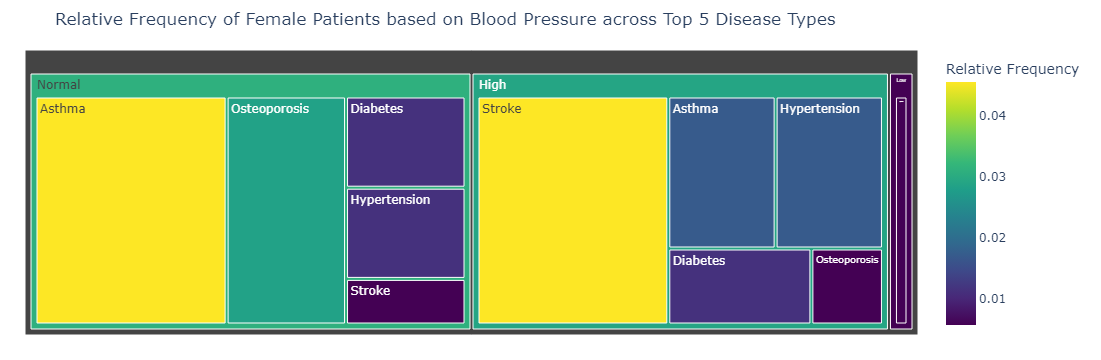

In [197]:
# Create TreeMap using Plotly

fig = px.treemap(selected_disease_relative_frequency, path=['Blood Pressure', 'Disease'], values='Relative Frequency',color='Relative Frequency',color_continuous_scale='viridis',   
                 title='Relative Frequency of Female Patients based on Blood Pressure across Top 5 Disease Types')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))  # Remove margin-top left right bottom
fig.show()


## Insights

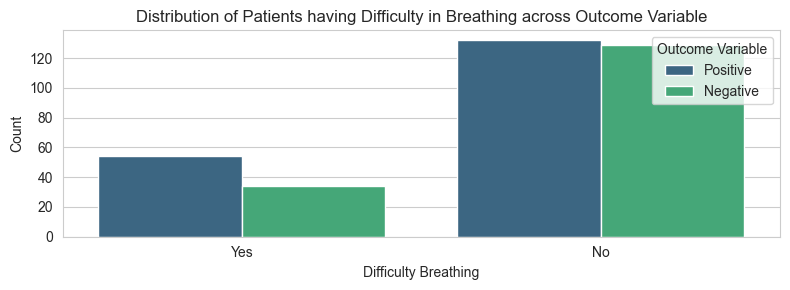

In [199]:
# Create a Grouped bar chart

plt.figure(figsize=(8, 3))
sns.countplot(data=df, x='Difficulty Breathing', hue='Outcome Variable', palette='viridis')
plt.title('Distribution of Patients having Difficulty in Breathing across Outcome Variable')
plt.xlabel('Difficulty Breathing')
plt.ylabel('Count')
plt.legend(title='Outcome Variable', loc='upper right')
plt.tight_layout()
plt.show()


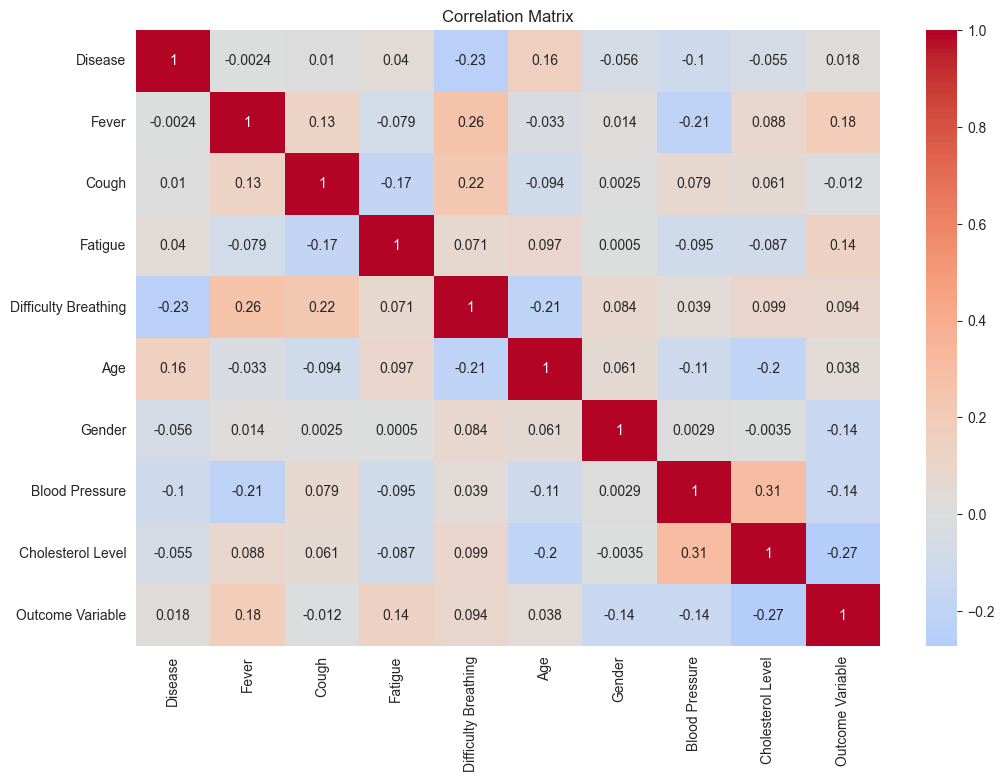

In [202]:
from sklearn.preprocessing import LabelEncoder

# Copying the data
data_encoded = df.copy()

# Using LabelEncoder to convert categorical features into numerical values
label_encoders = {}
for col in df.columns:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
    label_encoders[col] = le

# Compute the correlation matrix
correlation_matrix = data_encoded.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


The basic idea behind this case study is to use EDA techniques and visualization to 
gain insights that can be used for predictive modeling in forecasting diseas 
outcomes based on symptoms and age distribution. The analysis will help further  n
the development of effective strategies for disease prevention.